<a id="top"></a>
# **7.2 Fracture energy identification and size effect**

[![title](../fig/bmcs_video.png)](https://moodle.rwth-aachen.de/mod/page/view.php?id=643791)&nbsp;part 1

<div style="background-color:lightgray;text-align:left"> <img src="../icons/start_flag.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Starting point</b> </div> 

We have learned that fracture energy plays a crucial role in the simulation of structural response of concrete elements. The crucial questions remains, how can it be determined experimentally and what is the consequence of localization within a fracture process zone for structural assessment concepts. 

<div style="background-color:lightgray;text-align:left"> <img src="../icons/destination.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Where are we heading</b> </div> 

The knowledge of the area of a localized of a cracked specimen gives us a chance to determine the value of the total energy and divide it by the area of a crack to obtain the fracture energy. We have used this concept already in the notebook [6.3](../tour6_energy/6_3_localized_energy_dissipation.ipynb#G_F_measured) in the simulation of CFRP debonding. Let us briefly summarize the identification of the fracture energy for used to identify the value of fracture energy characterizing the concrete cracking.  

<a id="rilem_notched_bending_test"></a>
# **RILEM notched bending test**

An isolated tensile crack, mode-I crack, can be initiated using a notched specimen.
 Why
The most common configurations used to study the cracking behavior for a tensile
 notched
crack denoted as mode I are the wedge splitting test and notched, three-point
 three-point
bending
bending test. Both these tests aim at the characterization of the material behavior
test?
in terms of the softening law describing the relation between the tensile stress
transmitted across the localization zone and the corresponding crack opening.

Due to its simplicity, three-point-bending test of a notched concrete specimen has become 
a standard (RILEM) to determine the fracture energy $G_\mathrm{F}$ characterizing the cracking behavior of concrete. The test induces a single crack in the notched section
propagating straight upwards from the notch in a stable manner. The energy is
dissipated in a local region in the crack vicinity so that it can be directly ascribed
to the area of emerging crack surface.

**Direct evaluation of the fracture energy:** Recalling that we can characterize
the stable process of crack propagation by an amount of energy needed to produce
a unit crack area, i.e. fracture energy $G_\mathrm{F}$ , we can choose a more efficient and
pragmatic approach determining the fracture energy directly from the test without
having to perform numerical calibration. This is the idea behind the standardized
characterization procedure proposed by the RILEM committee. 

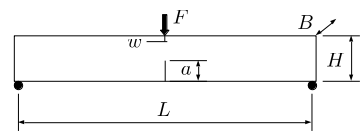

Recall that at the
point of failure, the whole energy has been consumed to produce the crack of 
surface area 
$$
A = B \, (H − a),
$$
where $H$ and $B$ denote the height and width of the beam
and $a$ is the notch depth. Then, assuming uniform dissipation during a stable crack
propagation we can set

$$
G_\mathrm{F} = \dfrac{W}{B \, (H-a)}
$$

However, this simple approach would ignore the fact that self-weight of the beam
also induced the initial deflection $w_0$. Neither the self-weight load, nor the corresponding
deflection are included in the experimentally recorded curve. The situation can be  illustrated 
as follows in the load-deflection diagram. 

![fw_Gf](../fig/F-w-Gf.png)

In the test, only the area $W_1$ is measured. At point $w_0$, the specimen will actually break down because it cannot sustain its own weight. Therefore, the area $W_2$ is hidden. It can only estimated as an area of the rectangle

$$
W_2 = F_0 w_0 = M g w_0
$$
where $F_0$ is the dead load given as the product of the weight of the beam between the supports $M$ and the gravity acceleration $g = 9.81 \mathrm{[m/s^2]}$. 

Thus, the true fracture energy obtained using the above test can be estimated as estimate
$$
G_\mathrm{F} = \dfrac{W_1 + M g w_0}{B\, (H-a)}
$$

A simple remedy to avoid the effect of self weight is to compensate for the initial deflection by including an extra weight outside of the supports, for example by doubling the beam length.

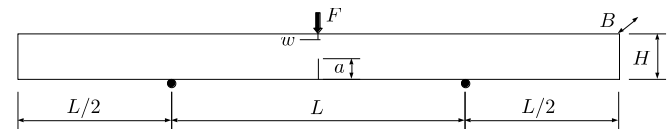

A pioneering work showing the systematic experimental approach to the identification of fracture energy has been presented by [Petersson (1982)](https://portal.research.lu.se/portal/files/4705811/1785208.pdf). The report provides a clear explanation of the test parameters, e.g. notch depth, curing conditions,  and their influence on the determined value of fracture energy. It served as a basis for the current RILEM standards used for characterization of wide range of concrete materials, including mixtures with short fibers. 

The discussion above demonstrates an important aim of theoretical research: develop simple characterization procedures that can deliver model parameters even for advanced models. We use the fracture energy $G_\mathrm{F}$ as an example of a successful effort, in which the theoretical development influenced the engineering practice by providing measures for standardization and comparability between various concrete mixtures in view of their quasi-brittleness.

# **Size effect** 

[![title](../fig/bmcs_video.png)](https://moodle.rwth-aachen.de/mod/page/view.php?id=643791)&nbsp;part 2

With the experimentally determined fracture energy at hand, and with a regularized model presented in we are now able to capture to predict the cracking response of a beam with modified dimensions and loading configuration. Even though that the model has only a limited range of validity, it can be used demonstrate and visualize an important phenomenon included in the behavior of concrete structures which must be considered also in engineering design rules.

The fact that the material softening leads to strain localization within a small dissipative zone around the propagating crack tip leads to a phenomenon called **size effect**. In simple terms, it states that the response of a structure cannot be simply scaled with its changed dimensions. Let us demonstrate this by performing a parametric study of the notched beam test in which we scale up the length and depth of the beam.

Let us again revisit the simulation of the three-point bending test. We will keep the size of the crack band constant, i.e. $L_\mathrm{cb} = 1~\mathrm{[N/mm]}$. This means that in small and in large specimens, the crack propagation is governed by the same fracture energy. 

In [1]:
%matplotlib widget
from bmcs_bending.bending3pt_2d import BendingTestModel
from ibvpy.tmodel.mats2D import MATS2DScalarDamage

Because we will perform several simulations, let us produce several models which we may consider as virtual specimens. Therefore, a function called `new_bt` is defined to construct an instance of the `BendingTestModel`,
This function has three parameters, `L`, `H`, and `a` representing the beam length, height and notch depth to introduce the scaling of dimensions in the parametric study. All other parameters are defined as constants within the function so that they are kept equal in all simulated specimens.

In [7]:
def new_bt(L, H, a):
    E = 30000
    f_ct = 3.3
    kappa_0 = f_ct / E
    bt = BendingTestModel(material_model='scalar damage', 
                          n_e_x=6, n_e_y=16, w_max=-2, k_max=1000)
    bt.time_line.step=0.02
    bt.history.warp_factor=100
    bt.cross_section.trait_set(B=50)
    bt.geometry.trait_set(L=L, H=H, a=a, L_cb=1);
    bt.material_model_.trait_set(E = E, nu = 0.0) # note nu = 0.0 to avoid compressive failure
    bt.material_model_.omega_fn = 'exp-slope'
    bt.material_model_.omega_fn_.trait_set(kappa_0=kappa_0, kappa_f=0.0336)
    bt.material_model_.trait_set(D_alg=0.95, eps_max=1);
    return bt

The simulated specimens will be collected in a dictionary `bt_dict` with each entry accessible via a key `scale` denoting the multiplier used to scale the dimensions of the beam. 

In [3]:
bt_dict = {}

The reference dimensions are equal to the study performed previously. The scales are defined in the variable `scale_list`. 

In [4]:
import numpy as np
scale_list = [0.5,1,2,4]
L0 = 2000
H0 = 200
a0 = 50
for scale in scale_list:
    print('calculating F-w and G_total for scale = %g' % scale)
    bt = new_bt(L=L0*scale, H=H0*scale, a=a0*scale)
    try: 
        bt.run()
    except StopIteration:
        print('simulation interupted due to slow convergence', scale)
    bt_dict[scale] = bt

calculating F-w and G_total for scale = 0.5
calculating F-w and G_total for scale = 1
calculating F-w and G_total for scale = 2
calculating F-w and G_total for scale = 4


<div style="background-color:lightgray;text-align:left"> <img src="../icons/view.png" alt="Run" width="40" height="40">
    &nbsp; &nbsp; <b>... let us put the results into a diagram</b> </div>

To evaluate the results, we want to collect the load deflection curves from each of the specimen stored in `bt_dict`. At the same time, we shall extract the value of the dissipated energy.  

In [5]:
import numpy as np
import matplotlib.pylab as plt
fig, (ax, ax_G) = plt.subplots(1,2, figsize=(8,3), tight_layout=True)
fig.canvas.header_visible=False
F_w_list = [bt_dict[scale].hist['Fw'].Fw for scale in scale_list ]
for scale, (F, w) in zip(scale_list, F_w_list):
    ax.plot(-w,-F,label='scale = %g' % scale)
ax.legend()
ax.set_xlabel(r'$w$ [mm]');
ax.set_ylabel(r'$F$ [N]');
G_list = [bt_dict[scale].hist['energy'].G_t[-1] for scale in scale_list]
U_bar_list = [np.max(bt_dict[scale].hist['energy'].U_bar_t) for scale in scale_list]
ax_G.plot(scale_list, G_list, marker='H', label=r'$G_\mathrm{total}$')
ax_G.plot(scale_list, U_bar_list, color='green', marker='H', label=r'$\mathcal{U}$')
ax_G.set_xlabel(r'$\mathrm{scale}$ [-]')
ax_G.set_ylabel(r'$G_\mathrm{total}$ [kJ]');
ax_G.set_ylim(ymin=0, ymax=1.1 * np.max(G_list));
ax_F = ax_G.twinx()
F_max_list = [np.max(-F) for F, w in F_w_list]
ax_F.plot(scale_list, F_max_list, marker='H', color='orange', label=r'$F_\max$');
ax_F.set_ylabel(r'$F_\max$ [N]');
ax_G.legend(loc=2)
ax_F.legend(loc=4);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

 - The total energy dissipation $G_\mathrm{total}$ increases proportionally to the cross sectional area
 - The maximum stored energy $\max({\mathcal{U}})$ is increasing non-proportionally to the cross sectional area
 - The ultimate load **does not** increase proportionally to the cross sectional area 
 - Large specimens exhibit more brittle failure than small specimens

A larger amount of energy stored within the elastic parts of the specimen accelerates the failure process. In a post peak regime, it acts as an additional load within the dissipative zones. When we change the size of the specimen, the size of the fracture process zone does not change. However, the material volume which stores energy increases. This means that the ratio between $G_\mathrm{F}$, needed to make a crack of a unit area stress free, and the stored energy driving the unloading process of surrounding elastic material changes. This ratio controls the brittleness of the structural response.

In [6]:
bt_dict[2].interact()

<div style="background-color:lightgray;text-align:left"> <img src="../icons/exercise.png" alt="Run" width="50" height="50">
    &nbsp; &nbsp; <a href="../exercises/X0701_Identification of the fracture energy.pdf"><b>Exercise X0701:</b></a> <b>Evaluation of fracture energy</b> 
</div>

<div style="background-color:lightgray;text-align:left;width:45%;display:inline-table;"> <img src="../icons/previous.png" alt="Previous trip" width="50" height="50">
    &nbsp; <a href="../tour7_cracking/7_1_bending3pt_2d.ipynb#top">7.1 Straight crack propagation</a> 
</div><div style="background-color:lightgray;text-align:center;width:10%;display:inline-table;"> <a href="#top"><img src="../icons/compass.png" alt="Compass" width="50" height="50"></a></div><div style="background-color:lightgray;text-align:right;width:45%;display:inline-table;"> 
    <a href="../tour8_bending/8_1_reinforced_beam.ipynb#top">8.1 Reinforced beam bending</a>&nbsp; <img src="../icons/next.png" alt="Previous trip" width="50" height="50"> </div> 